<a href="https://colab.research.google.com/github/McPetzka/Fitness-shopping-prediction/blob/main/Fitness.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

1. Initial data overview

In [3]:
data= pd.read_csv('CardioGoodFitness.csv')

In [4]:
data.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [6]:
 data.shape

(180, 9)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [23]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,180.0,28.788889,6.943498,18.0,24.00,26.0,33.00,50.0
Education,180.0,15.572222,1.617055,12.0,14.00,16.0,16.00,21.0
Usage,180.0,3.455556,1.084797,2.0,3.00,3.0,4.00,7.0
Fitness,180.0,3.311111,0.958869,1.0,3.00,3.0,4.00,5.0
Income,180.0,53719.577778,16506.684226,29562.0,44058.75,50596.5,58668.00,104581.0
Miles,180.0,103.194444,51.863605,21.0,66.00,94.0,114.75,360.0


Categorical values summary

In [10]:
data.MaritalStatus.value_counts()

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

In [97]:
data.Gender.value_counts()

Male      104
Female     76
Name: Gender, dtype: int64

2. Descriptive statitistics and Visualizations

*Even distribution for two models regardless the gender, while incresed preference for TM798  among male customers*

In [13]:
data.groupby('Product')['Gender'].value_counts()

Product  Gender
TM195    Female    40
         Male      40
TM498    Male      31
         Female    29
TM798    Male      33
         Female     7
Name: Gender, dtype: int64

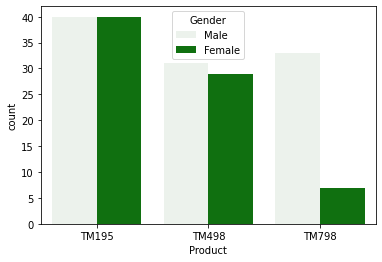

In [27]:
sns.countplot(x="Product", hue = "Gender", data=data, color="green")

In [32]:
group=data[['Product','Age','Income','Education','Usage','Miles','Fitness']].groupby('Product').mean().round()
group

,Age,Income,Education,Usage,Miles,Fitness
Product,,,,,,
TM195,29.0,46418.0,15.0,3.0,83.0,3.0
TM498,29.0,48974.0,15.0,3.0,88.0,3.0
TM798,29.0,75442.0,17.0,5.0,167.0,5.0


Model TM798 is purchased by customers with more years of Education and higher Income 

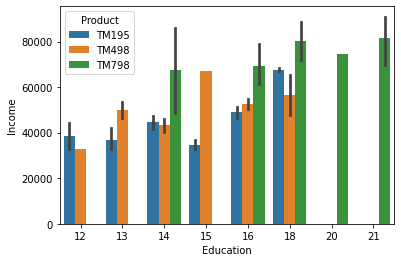

In [25]:
sns.barplot(x='Education',y='Income',hue="Product",data=data)


Visible positive correlation between usage and miles

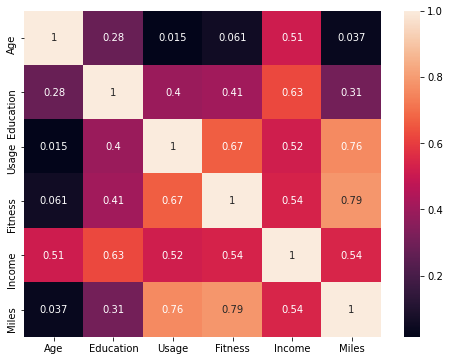

In [21]:
plt.figure(figsize=(8,6))
p=sns.heatmap(data.corr(), annot=True) 

Model TM798 is more popular with customers representaing higher fitness and miles

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 7.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 30.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


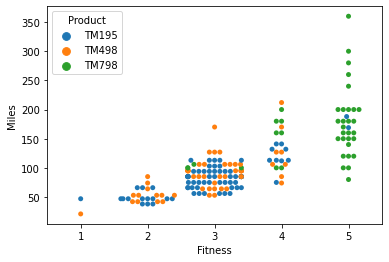

In [29]:
sns.swarmplot(x='Fitness', y='Miles', data=data, hue = "Product")

Models popularity regarding Marital status

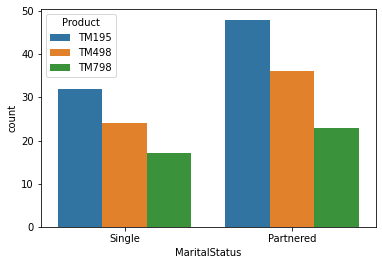

In [31]:
sns.countplot(x="MaritalStatus", hue = "Product", data=data)

In [44]:
data[['Gender','Usage','Miles', 'Fitness']].groupby(['Gender']).mean().round()


,Usage,Miles,Fitness
Gender,,,
Female,3.0,90.0,3.0
Male,4.0,113.0,4.0


In [46]:
data[['MaritalStatus','Usage','Miles', 'Fitness']].groupby(['MaritalStatus']).mean().round()

,Usage,Miles,Fitness
MaritalStatus,,,
Partnered,3.0,104.0,3.0
Single,3.0,102.0,3.0


In [47]:
pd.pivot_table(data,values=['Age',index=['Product'],aggfunc='mean')

,Age
Product,
TM195,28.55
TM498,28.90
TM798,29.10


 3. Data preprocessing

Separating dependant variable

In [76]:
X=data.iloc[:,1:].values
y=data.iloc[:,0].values


Transforming labels 

In [77]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
y= le.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2])

Enconding categorical variables

In [78]:
X[:2,:]

array([[18, 'Male', 14, 'Single', 3, 4, 29562, 112],
       [19, 'Male', 15, 'Single', 2, 3, 31836, 75]], dtype=object)

In [79]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1,3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [80]:
X[:2,:]

array([[0.0, 1.0, 0.0, 1.0, 18, 14, 3, 4, 29562, 112],
       [0.0, 1.0, 0.0, 1.0, 19, 15, 2, 3, 31836, 75]], dtype=object)

Splitting data into train and test sets

In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

Scaling sets

In [83]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train[:,2:]=sc.fit_transform(X_train[:,2:])
X_test[:,2:]=sc.transform(X_test[:,2:])

X_train

array([[0.0, 1.0, -1.3038404810405289, ..., -0.30883862813723123,
        -1.305325975861186, -0.724279083285138],
       [1.0, 0.0, 0.7669649888473699, ..., -1.3257463061500654,
        -1.1683184224554086, -1.21705279569662],
       [0.0, 1.0, 0.7669649888473699, ..., -0.30883862813723123,
        0.6812835485225852, -0.13674119540990978],
       ...,
       [1.0, 0.0, -1.3038404810405289, ..., -2.3426539841628995,
        0.7060461274362944, -1.539250992273358],
       [1.0, 0.0, 0.7669649888473699, ..., -0.30883862813723123,
        0.06474955819658731, -0.15569403050265906],
       [0.0, 1.0, -1.3038404810405289, ..., 1.7249767278884371,
        2.327422675238789, 0.9056647346913017]], dtype=object)

Decision Tree model predicting which model customer will purchase

In [91]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [92]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [0 0]
 [1 1]
 [2 2]
 [1 1]
 [0 0]
 [0 0]
 [1 2]
 [2 2]
 [0 1]
 [0 0]
 [0 2]
 [0 2]
 [0 0]
 [0 0]
 [1 1]
 [2 2]
 [2 2]
 [0 0]
 [1 1]
 [0 2]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [2 2]
 [1 1]
 [2 2]
 [2 2]
 [2 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [2 2]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]]


In [93]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[18  1  1]
 [ 1 12  0]
 [ 3  1  8]]


0.8444444444444444

Decision Tree model predicting which model customer will purchase

In [94]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [95]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [0 0]
 [1 1]
 [2 2]
 [0 1]
 [0 0]
 [0 0]
 [1 2]
 [2 2]
 [0 1]
 [1 0]
 [2 2]
 [2 2]
 [0 0]
 [0 0]
 [0 1]
 [2 2]
 [2 2]
 [0 0]
 [1 1]
 [2 2]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [2 2]
 [0 1]
 [2 2]
 [2 2]
 [2 0]
 [0 0]
 [0 0]
 [2 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [2 2]
 [1 1]
 [1 0]
 [0 0]
 [2 1]
 [0 0]]


In [96]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[17  2  1]
 [ 4  7  2]
 [ 0  1 11]]


0.7777777777777778